# 📊 EDA: Telco Customer Churn

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Загружаем датасет
df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Общая информация

In [3]:

print("Shape:", df.shape)
df.info()
df.describe(include="all").T


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Пропуски

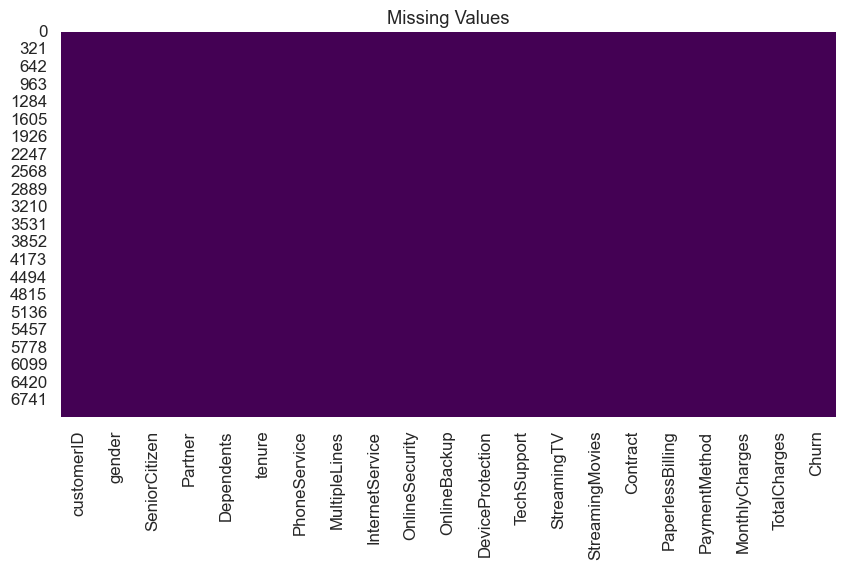

In [4]:

df.isnull().sum()

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values")
plt.show()


## 3. Целевая переменная (Churn)

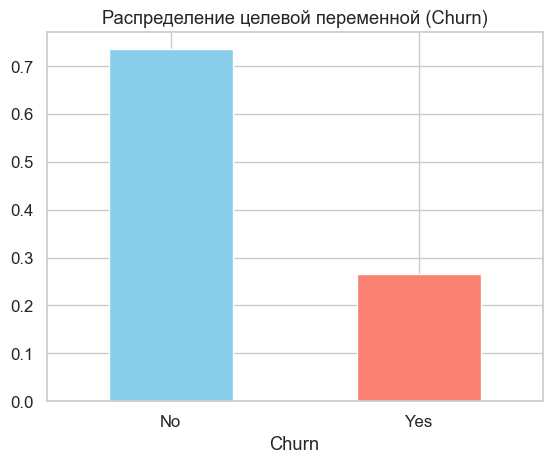

In [5]:

df["Churn"].value_counts(normalize=True).plot(kind="bar", color=["skyblue","salmon"])
plt.title("Распределение целевой переменной (Churn)")
plt.xticks(rotation=0)
plt.show()


## 4. Числовые признаки

Числовые: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


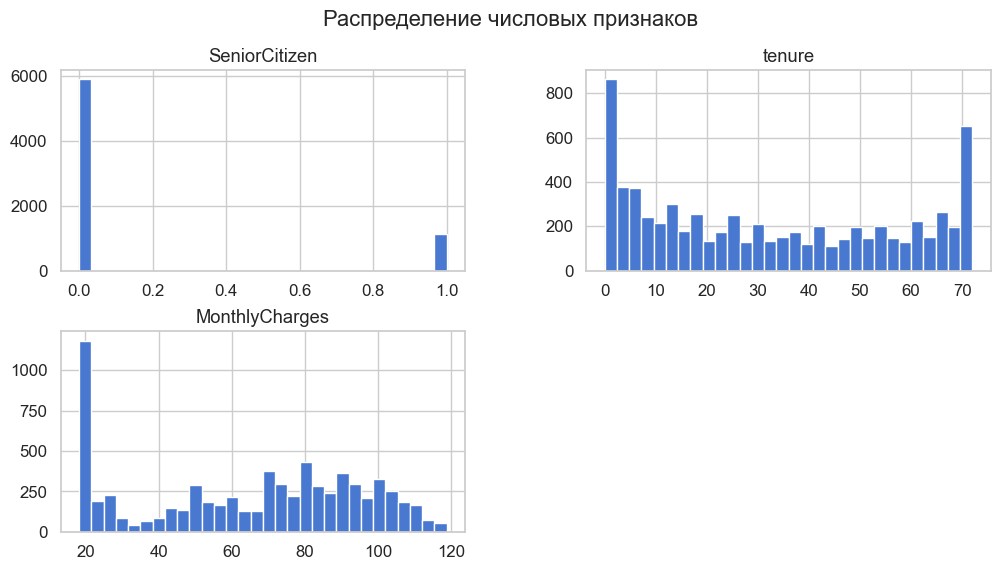

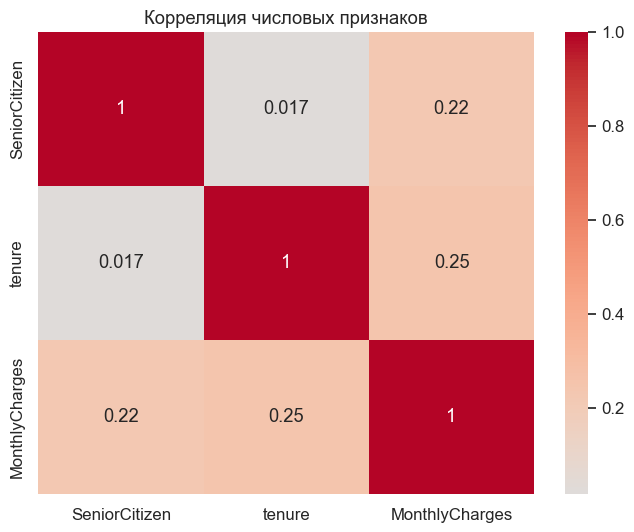

In [6]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Числовые:", num_cols)

df[num_cols].hist(figsize=(12, 6), bins=30)
plt.suptitle("Распределение числовых признаков")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляция числовых признаков")
plt.show()


## 5. Категориальные признаки

Категориальные: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


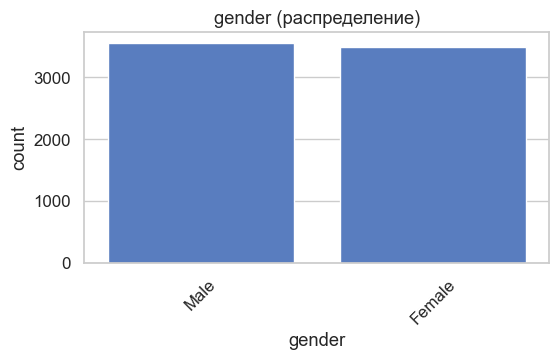

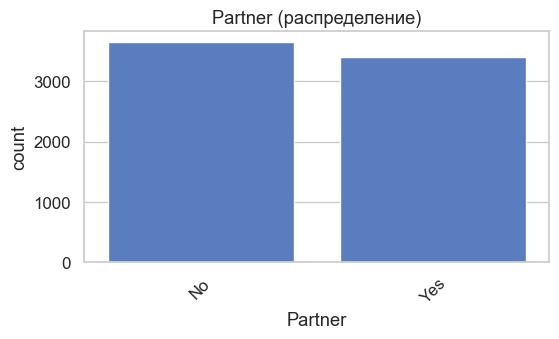

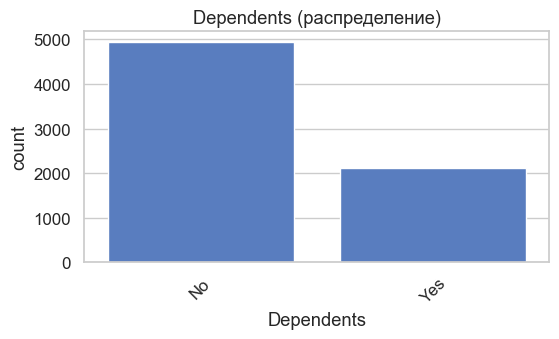

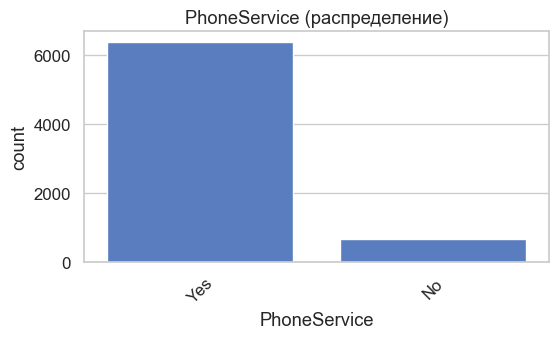

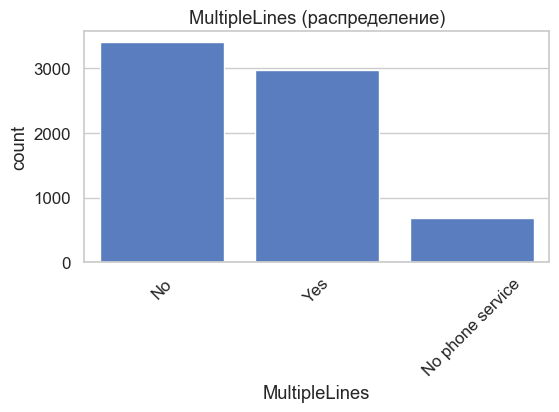

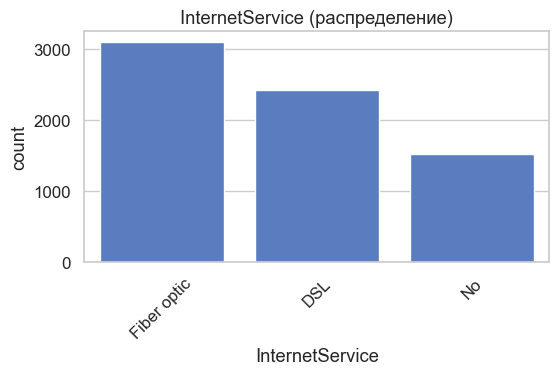

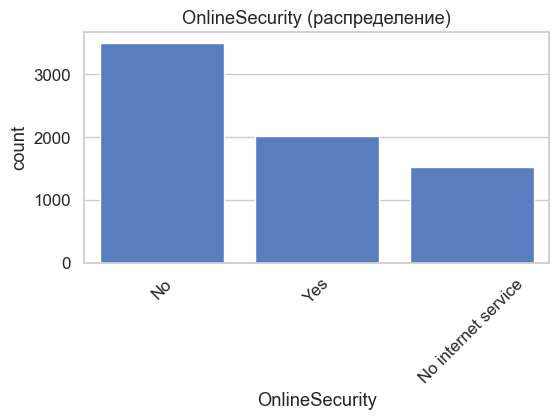

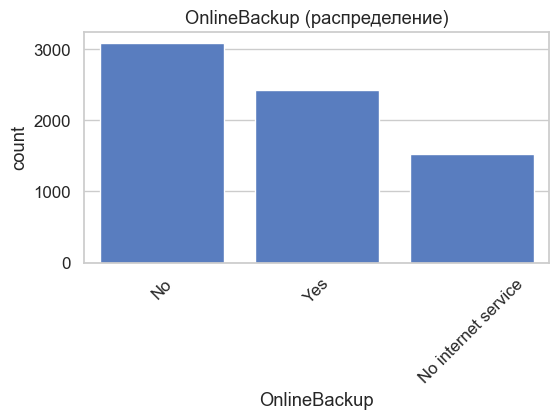

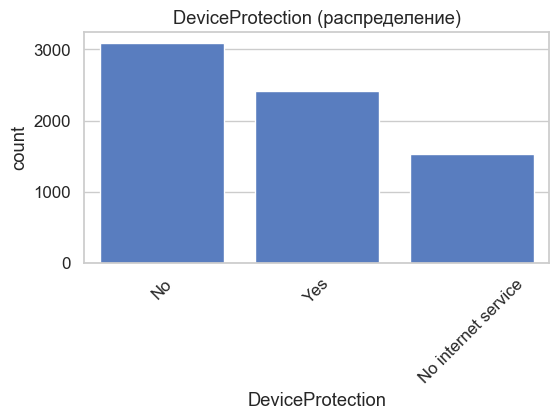

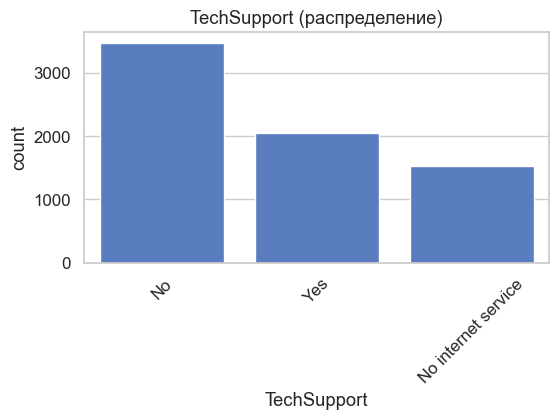

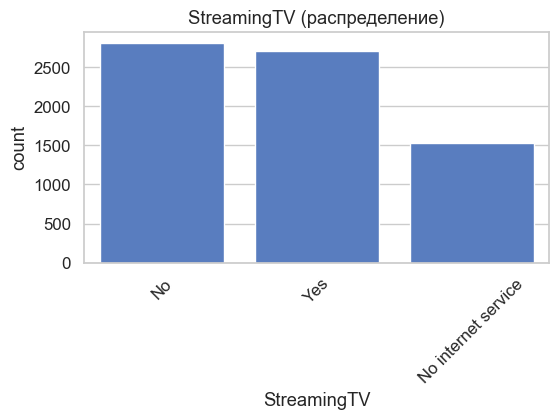

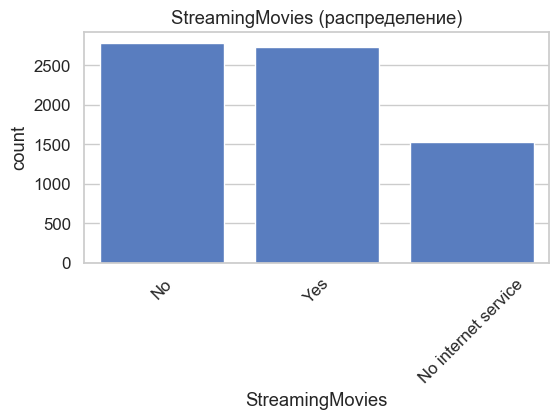

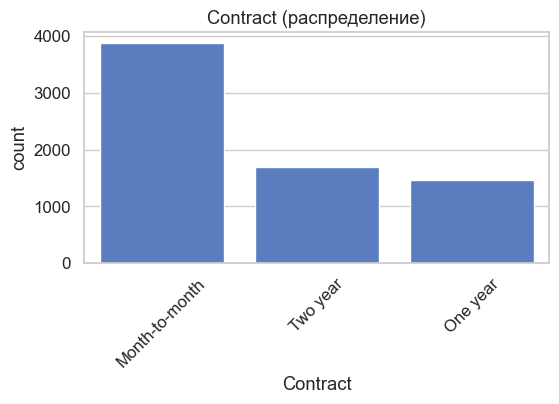

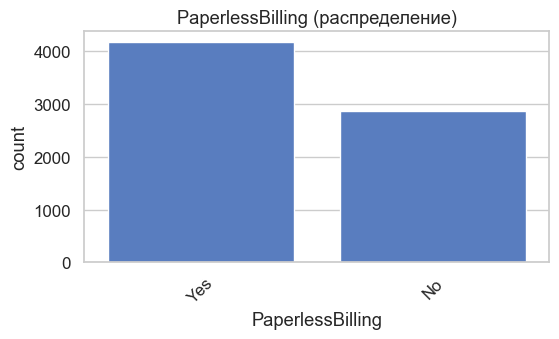

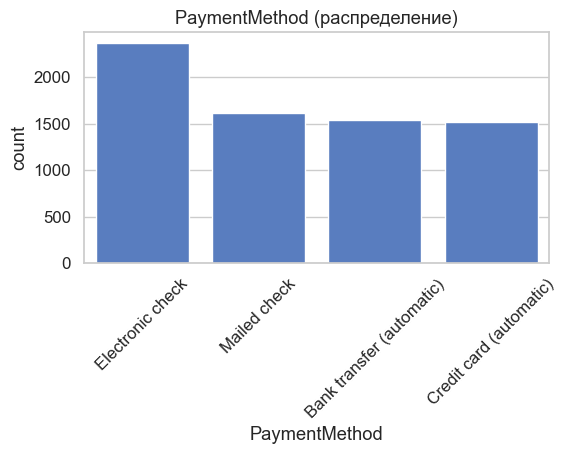

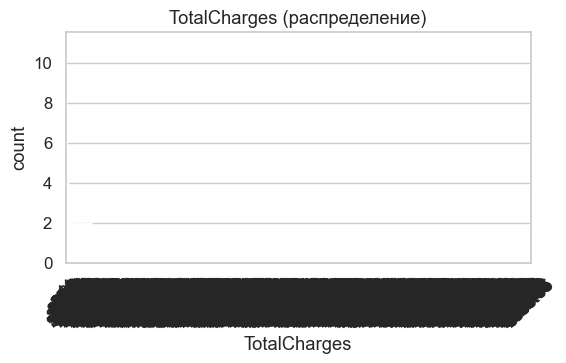

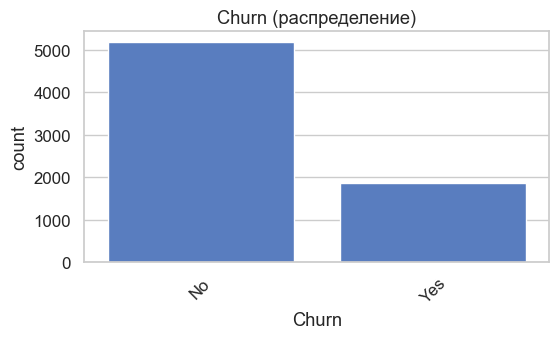

In [7]:

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [c for c in cat_cols if c != "customerID"]

print("Категориальные:", cat_cols)

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"{col} (распределение)")
    plt.xticks(rotation=45)
    plt.show()


## 6. Churn vs признаки

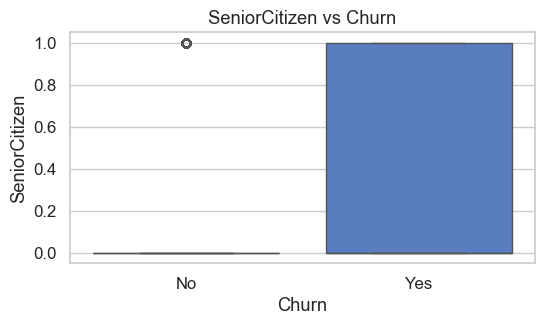

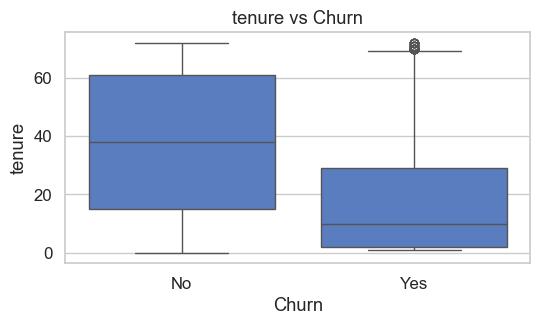

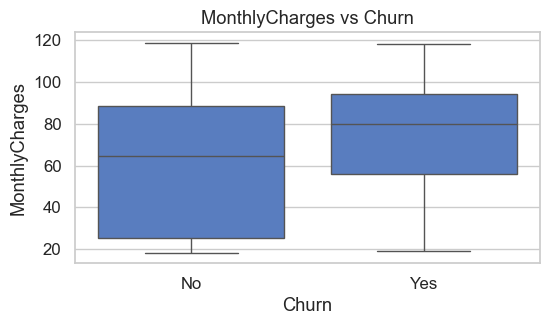

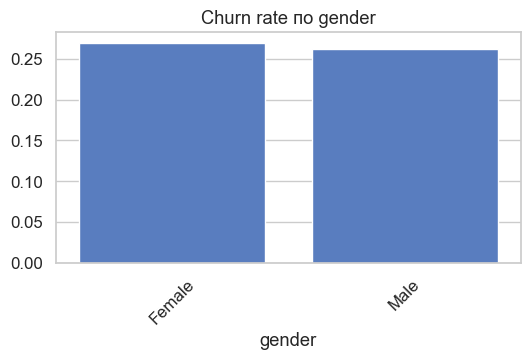

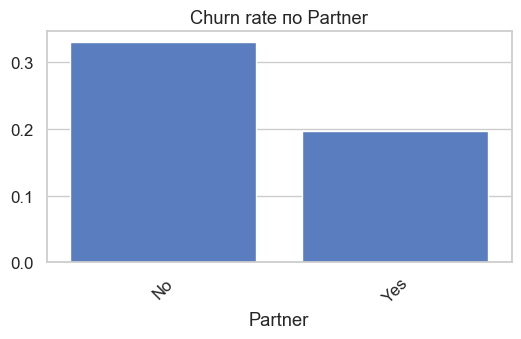

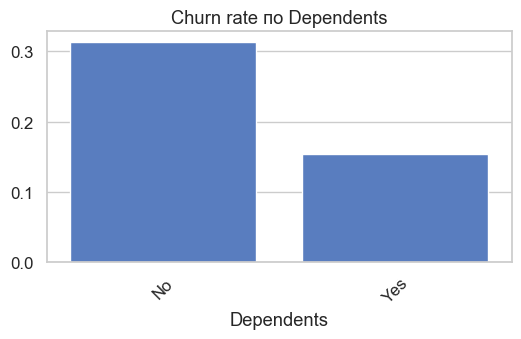

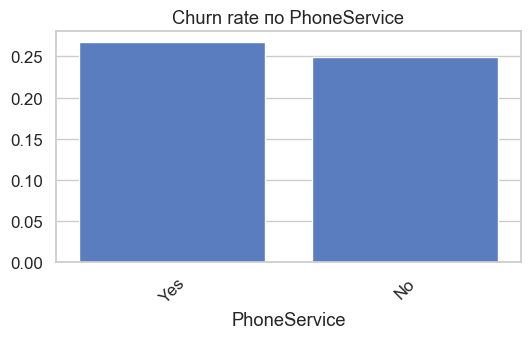

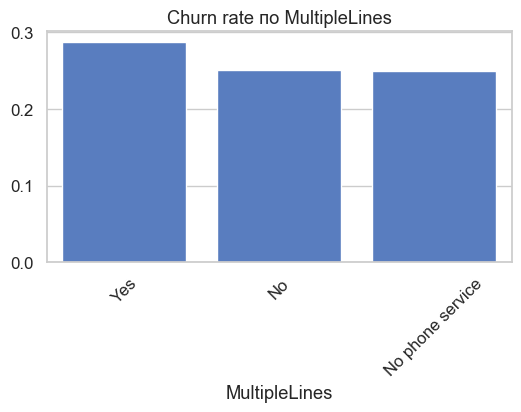

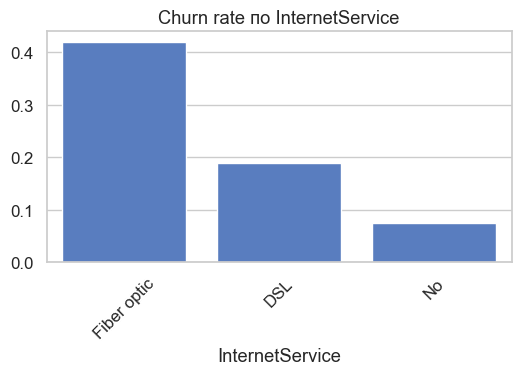

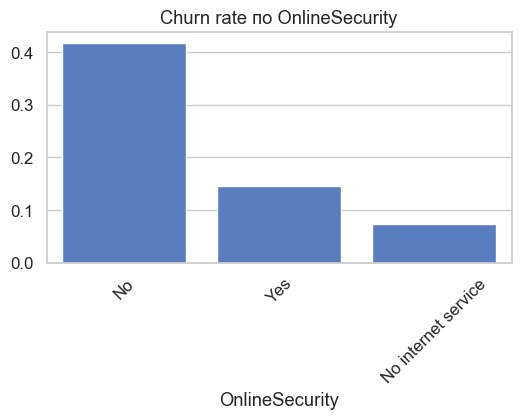

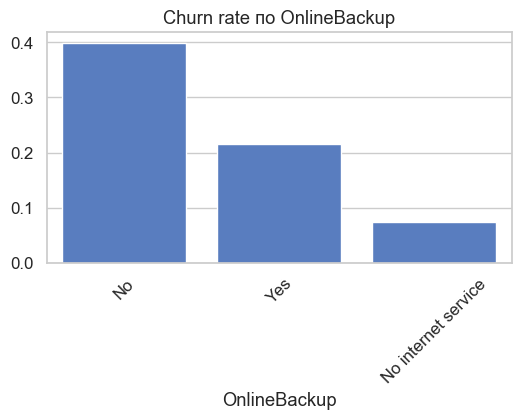

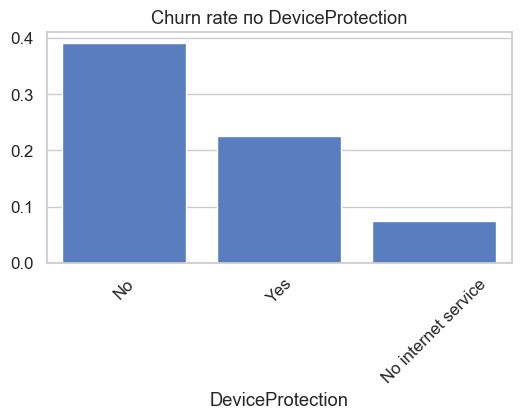

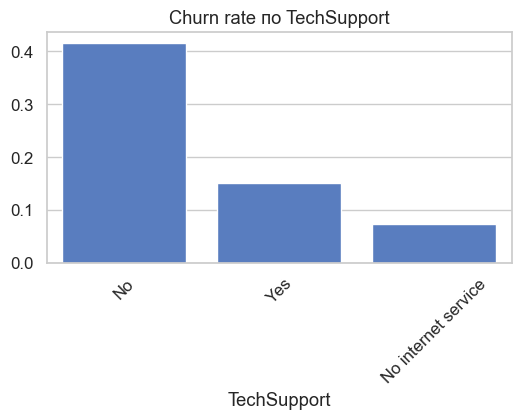

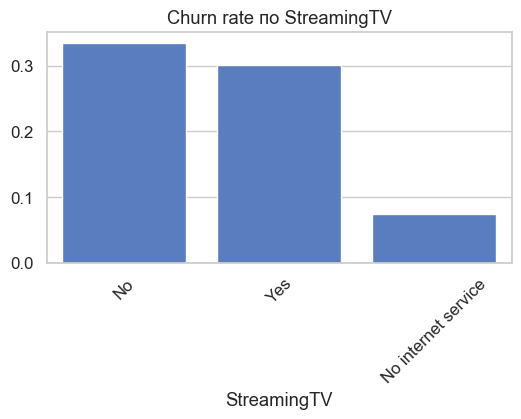

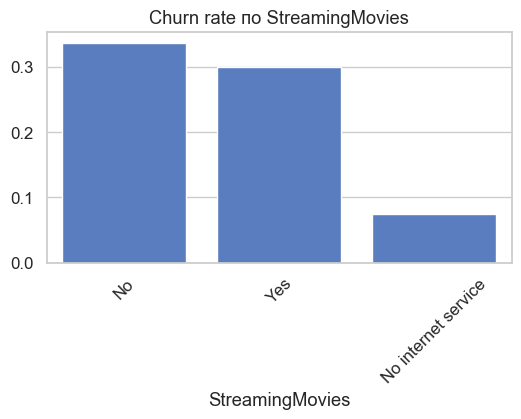

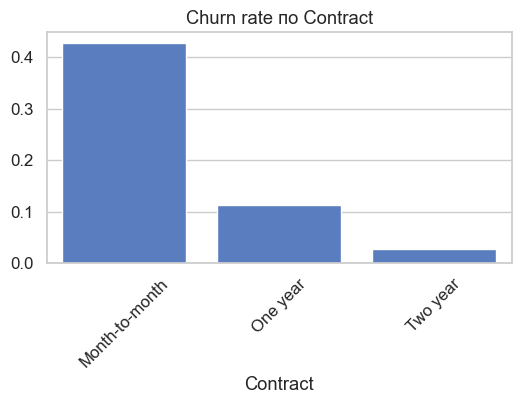

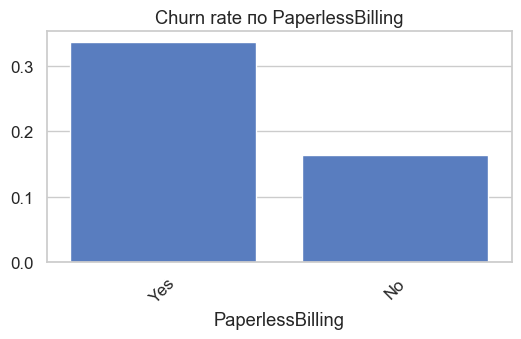

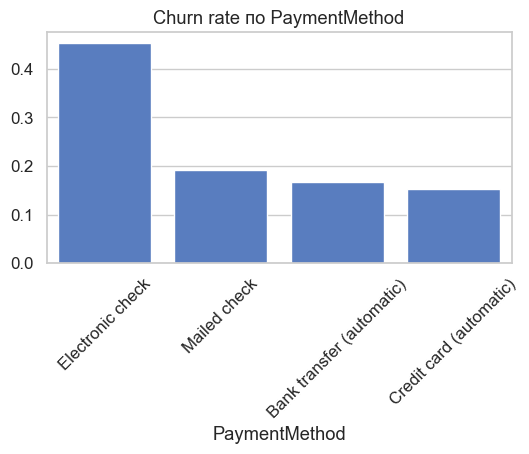

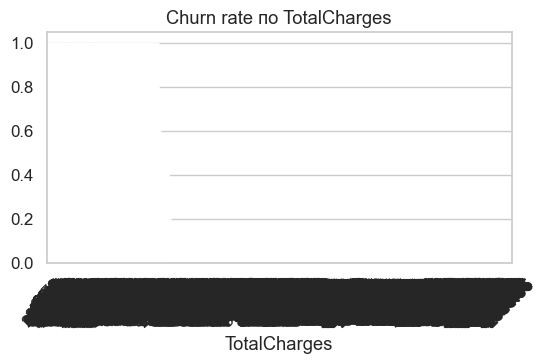

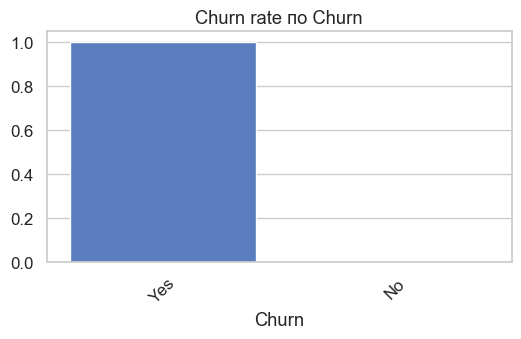

In [8]:

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.show()

for col in cat_cols:
    plt.figure(figsize=(6,3))
    churn_rate = df.groupby(col)["Churn"].apply(lambda x: (x=='Yes').mean()).sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f"Churn rate по {col}")
    plt.xticks(rotation=45)
    plt.show()


## 7. Взаимосвязи признаков

In [ ]:

internet_services = ["OnlineSecurity","OnlineBackup","DeviceProtection",
                     "TechSupport","StreamingTV","StreamingMovies"]

for col in internet_services:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()



## 8. Выводы

- Целевая переменная **несбалансированная** (≈73% остаются, 27% уходят).  
- **SeniorCitizen**, **Contract**, **InternetService** и онлайн-услуги сильно влияют на отток.  
- **MonthlyCharges** и **TotalCharges** показывают различия между клиентами, которые остаются и уходят.  
- Клиенты с помесячным контрактом и без дополнительных услуг чаще уходят.  
